# Visualizing experiment results as scatterplots

This view will take data seen in other notebooks, such as `PredictionResultsAnalysis` and `ResultsAnalysis_CutMixTrain` and visualizes them in a scatterplot format, to be consistent with the CIFAR-10.2 paper (Lu et al)

##### Import Libraries and Packages

In [1]:
from PIL import Image
import numpy as np
import io
import boto3
import re
import os
import seaborn as sns
import random
from pathlib import Path
from glob import glob
import pandas as pd
import torch
import torchvision
import torchvision.transforms as transforms
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

pd.set_option('display.max_rows', 500)

#### Loading in Data and Preprocessing

In [3]:
search_path = "./"
file_extension = "*.csv"
os.chdir('/home/ec2-user/SageMaker/w210-capstone/model_results/')
dfs = []
[dfs.append(pd.read_csv(file, index_col=0))
 for path, subdir, files in os.walk(search_path)
 for file in glob(os.path.join(path, file_extension))]

df_orig = pd.concat(dfs, ignore_index=True)
#df_orig['Accuracy'] = df_orig['Accuracy'].apply(lambda x: x*100)
#df_orig['Original_CI'] = df_orig.Original_CI.apply(lambda x: literal_eval(x))
#df_orig['Orig_CI_Low'], df_orig['Orig_CI_Hi'] = zip(*df_orig.Original_CI)

# Filter data into subsets based on test dataset used
df_orig_cifar10 = df_orig[df_orig['Testset'] == 'cifar10']
df_orig_cifar101 = df_orig[df_orig['Testset'] == 'cifar10.1']

In [4]:
df_orig

,Model,Epoch,Testset,Loss,Accuracy,Original_Accuracy,Original_CI,Original_Accuracy_300epochs,Original_CI_300epochs
0,resnet_basic_32_ra_2_20_c10val,400,cifar10,1.8833,0.7127,92.5,"(92.0, 93.0)",NaN,NaN
1,resnet_basic_32_ra_2_20_c10val,400,cifar10.1,2.9549,0.5855,84.9,"(83.2, 86.4)",NaN,NaN
2,resnet_basic_32_ra_2_20_c10val_refined400,50,cifar10.1,0.7678,0.7690,84.9,"(83.2, 86.4)",NaN,NaN
3,resnet_basic_32_ra_2_20_c10val_refined400,50,cifar10,0.4247,0.8693,92.5,"(92.0, 93.0)",NaN,NaN
4,resnext_29_4x64d_ra_2_20,400,cifar10,0.7273,0.7895,NaN,NaN,96.4,"(96.0, 96.7)"
5,resnext_29_4x64d_ra_2_20,400,cifar10.1,1.2738,0.6380,NaN,NaN,89.6,"(88.2, 90.9)"
6,resnext_29_4x64d_ra_2_20_refined400,50,cifar10,0.2439,0.9260,NaN,NaN,96.4,"(96.0, 96.7)"
7,resnext_29_4x64d_ra_2_20_refined400,50,cifar10.1,0.5095,0.8505,NaN,NaN,89.6,"(88.2, 90.9)"
8,wrn_28_10_ra_2_20_c10val,400,cifar10,0.6113,0.8456,92.5,"(92.0, 93.0)",NaN,NaN
9,wrn_28_10_ra_2_20_c10val,400,cifar10.1,1.1302,0.7365,84.9,"(83.2, 86.4)",NaN,NaN


In [126]:
final_score_subset = df_orig[['Model', 'Accuracy', 'Testset']].sort_values(by=['Model'])

# Remove models that we did not run randaugment datasets through
final_score_subset = final_score_subset[~final_score_subset["Model"].str.contains('resnet_basic_44')]
final_score_subset = final_score_subset[~final_score_subset["Model"].str.contains('pyramidnet_basic_110_84')]
final_score_subset = final_score_subset[~final_score_subset["Model"].str.contains('resnext_29_8x64d')]


p2 = re.compile("([\d]+)(_refined)?(\d*)")

final_score_subset['ra'] = final_score_subset['Model'].str.contains("ra_")
final_score_subset['cm'] = final_score_subset["Model"].str.contains("cm_")

# make text field for classifying base, cm, or ra
final_score_subset['base'] = np.logical_and(np.logical_not(final_score_subset['ra']), \
                                            np.logical_not(final_score_subset['ra']))

def training_type_extraction(row):
    if row['ra']:
        ret_val = 'RandAugment'
    elif row['cm']:
        ret_val = 'CutMix'
    elif row['base']:
        ret_val = 'Base Model'
    else:
        ret_val = 'Other'
    return ret_val

final_score_subset['Training Type'] = final_score_subset.apply(lambda row: training_type_extraction(row), axis=1)


def ra_N_extraction(row):
    p3 = re.compile("ra_(\d+)_(\d+)")
    N=0 
    if row['ra'] == True :
        srch3 = p3.search(row['Model'].lower())
        N = int(srch3.group(1))
    return N

def ra_M_extraction(row):
    p3 = re.compile("ra_(\d+)_(\d+)")
    M=0 
    if row['ra'] == True :
        srch3 = p3.search(row['Model'].lower())
        M = int(srch3.group(2))
    return M

def cm_alpha_extraction(row):
    p3 = re.compile("cm_(\d+)_([\.\d]+)")
    M=0 
    if row['cm'] == True :
        srch3 = p3.search(row['Model'].lower())
        M = srch3.group(2)
    return M

final_score_subset['N'] = final_score_subset.apply(lambda row: ra_N_extraction(row), axis=1)
final_score_subset['M'] = final_score_subset.apply(lambda row: ra_M_extraction(row), axis=1)
final_score_subset['alpha'] = final_score_subset.apply(lambda row: cm_alpha_extraction(row), axis=1)
cols = ['N', 'M']
final_score_subset['hue'] = final_score_subset[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)


#final_score_subset[final_score_subset['Model'].str.contains("refined300")]
final_score_subset

,Model,Accuracy,Testset,ra,cm,base,Training Type,N,M,alpha,hue
34,densenet_BC_100_12,0.8875,cifar10,False,False,True,Base Model,0,0,0,0_0
37,densenet_BC_100_12,0.8830,cifar10.1,False,False,True,Base Model,0,0,0,0_0
36,densenet_BC_100_12,0.9484,cifar10,False,False,True,Base Model,0,0,0,0_0
35,densenet_BC_100_12,0.9456,cifar10,False,False,True,Base Model,0,0,0,0_0
185,densenet_BC_100_12_cm_1_.5,0.2710,cifar10.1,False,True,True,CutMix,0,0,.5,0_0
184,densenet_BC_100_12_cm_1_.5,0.3093,cifar10,False,True,True,CutMix,0,0,.5,0_0
187,densenet_BC_100_12_cm_1_.5_refined400,0.9374,cifar10,False,True,True,CutMix,0,0,.5,0_0
186,densenet_BC_100_12_cm_1_.5_refined400,0.8630,cifar10.1,False,True,True,CutMix,0,0,.5,0_0
17,densenet_BC_100_12_cm_1_1,0.8250,cifar10.1,False,True,True,CutMix,0,0,1,0_0
16,densenet_BC_100_12_cm_1_1,0.9055,cifar10,False,True,True,CutMix,0,0,1,0_0


In [127]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 7

#### Plot for CutMix + RandAugment Results

Text(0.5, 1.0, 'Data Augmentation and the Distribution Gap')

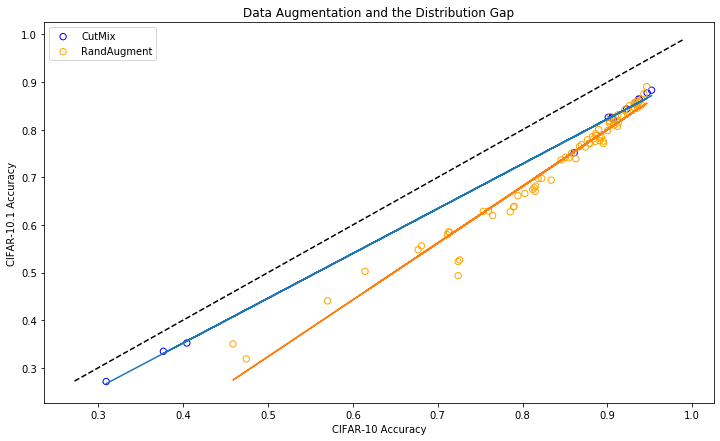

In [142]:
training_types = final_score_subset['Training Type'].unique()[1:3]

colors = ['blue', 'orange', 'teal', 'purple', 'red']
i = 0
for traintype in training_types:
    df_temp = final_score_subset[final_score_subset['Training Type'] == traintype]
    x = df_temp[df_temp["Testset"] == 'cifar10']['Accuracy']
    y = df_temp[df_temp["Testset"] == 'cifar10.1']['Accuracy']
    color_tmp = colors[i]
    plt.scatter(x,y, s = 40, facecolors = 'none', edgecolors = color_tmp, label = traintype)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x))
    i += 1

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', color = "black")
    
    
abline(1, 0)
plt.legend()
plt.ylabel("CIFAR-10.1 Accuracy")
plt.xlabel("CIFAR-10 Accuracy")
plt.title("Data Augmentation and the Distribution Gap")

#### Plot of different RandAugment Variations

Text(0.5, 1.0, 'RandAugment Augmentation and the Distribution Gap')

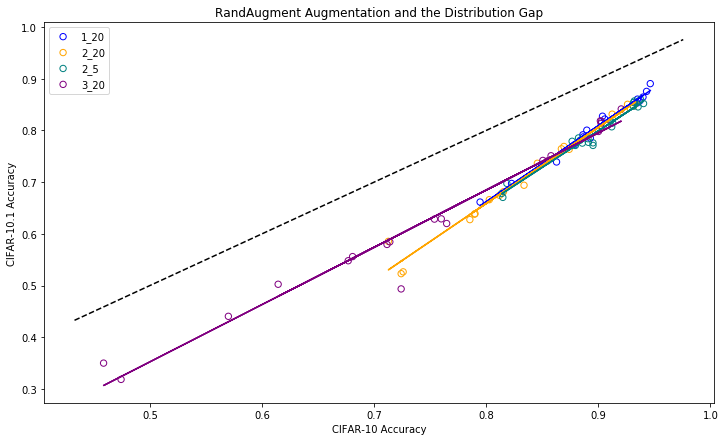

In [141]:
df_temp_subset = final_score_subset[final_score_subset['Training Type'] == 'RandAugment']
training_types = df_temp_subset['hue'].unique()
colors = ['blue', 'orange', 'teal', 'purple', 'red']
i = 0
for traintype in training_types:
    df_temp = df_temp_subset[df_temp_subset['hue'] == traintype]
    x = df_temp[df_temp["Testset"] == 'cifar10']['Accuracy']
    y = df_temp[df_temp["Testset"] == 'cifar10.1']['Accuracy']
    color_tmp = colors[i]
    plt.scatter(x,y, s = 40, facecolors = 'none', edgecolors = color_tmp, label = traintype)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x), color = color_tmp)
    i += 1

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', color = "black")
    
    
abline(1, 0)
plt.legend()
plt.ylabel("CIFAR-10.1 Accuracy")
plt.xlabel("CIFAR-10 Accuracy")
plt.title("RandAugment Augmentation and the Distribution Gap")

#### Plotting different CutMix Variations

Text(0.5, 1.0, 'CutMix Augmentation and the Distribution Gap')

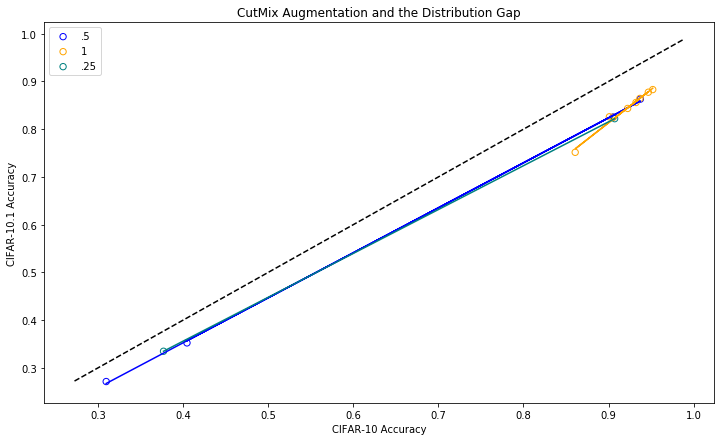

In [140]:
df_temp_subset = final_score_subset[final_score_subset['Training Type'] == 'CutMix']
training_types = df_temp_subset['alpha'].unique()
colors = ['blue', 'orange', 'teal', 'purple', 'red']
i = 0
for traintype in training_types:
    df_temp = df_temp_subset[df_temp_subset['alpha'] == traintype]
    x = df_temp[df_temp["Testset"] == 'cifar10']['Accuracy']
    y = df_temp[df_temp["Testset"] == 'cifar10.1']['Accuracy']
    color_tmp = colors[i]
    plt.scatter(x,y, s = 40, facecolors = 'none', edgecolors = color_tmp, label = traintype)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x), color = color_tmp)
    i += 1

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', color = "black")
    
    
abline(1, 0)
plt.legend()
plt.ylabel("CIFAR-10.1 Accuracy")
plt.xlabel("CIFAR-10 Accuracy")
plt.title("CutMix Augmentation and the Distribution Gap")

In [132]:
np.arange(0.5, 0.95, 0.05)

array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 ])